Documentation: https://dynamic-community-fba.readthedocs.io/en/latest/index.html 

# libraries

In [1]:
pip install dcFBA


  Using cached cbmpy-0.8.8.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached xlwt-1.3.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached XlsxWriter-3.2.0-py3-none-any.whl.metadata (2.6 kB)
Using cached cbmpy-0.8.8.1-py3-none-any.whl (580 kB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 3.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.6/3.8 MB 4.0 MB/s eta 0:00:01
   ------------------------ --------------- 2.4/3.8 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0

In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 9.1 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 8.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 8.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.6 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.6 MB/s eta

In [3]:
import matplotlib.pyplot as plt
import cbmpy
from cbmpy.CBModel import Model
import numpy as np #numpy version 1.26 or lower is required

In [2]:
print(np.__version__)

1.26.4


# example to integrate dfba into pairwise communities

## model

In [7]:
model = cbmpy.loadModel("Klebsiella_pneumoniae_pneumoniae_MGH78578.xml")

Attempting to load SBML file: Klebsiella_pneumoniae_pneumoniae_MGH78578.xml
SBML Level 3 FBC version 2 model detected, loading with cbmpy.readSBML3FBC()
FBC version: 2
M.getNumReactions: 1817
M.getNumSpecies: 1379
FBC.getNumObjectives: 1
FBC.getNumParameters: 3
FBC.getNumGeneProducts: 1393
Zero dimension compartment detected: c
Zero dimension compartment detected: e
FluxBounds process1: 0.037
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.065
Groups support: <GroupsModelPlugin>
Group.getNumGroups: 76

User defined contraint FBC version 2
SBML3 load time: 1.625



In [8]:
sol = cbmpy.doFBA(model)

User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.07355189323425293


cplx_analyzeModel FBA --> LP time: 0.07355189323425293

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 667 rows and 697 columns.
Aggregator did 357 substitutions.
Reduced LP has 355 rows, 763 columns, and 3785 nonzeros.
Presolve time = 0.02 sec. (2.96 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =          1000.000000
Perturbation started.
Iteration:    51   Dual objective     =          1000.000000
Iteration:   124   Dual objective     =           999.929887
Iteration:   198   Dual objective     =           999.890514
Iteration:   260   Dual objective     =           496.530605
Iteration:   322   Dual objective     =           318.493987
Iteration:   384   Dual objective     =           173.832062
Iteration:   446   Dual objective     =           142.518727
Iteration:   5

In [21]:
li = model.reactions

In [22]:
li

 ...]

## diet

In [ ]:
diet = pd.read_csv('WesternDietAGORA2.txt', sep='\t', header=None)
diet.head()
diet[1] = -1 * diet[1]
diet.head()
diet_dict = {name.replace('(e)', '_m'): value for name, value in zip(diet[0], diet[1])}
diet_dict

# loading the model

In [10]:
iJR904: Model = cbmpy.readSBML3FBC("cbmpy_test_ecoli") #Load the model
solution = cbmpy.doFBA(iJR904) #Perform FBA, returns the objective value
#FBAsol = iJR904.getSolutionVector(names=True) #Get all reaction ids with there flux value

cbmpy_test_ecoli
FBC version: 2
M.getNumReactions: 1075
M.getNumSpecies: 761
FBC.getNumObjectives: 1
FBC.getNumParameters: 7
FBC.getNumGeneProducts: 904
Zero dimension compartment detected: c
Zero dimension compartment detected: e
FluxBounds process1: 0.021
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.028
Groups support: <GroupsModelPlugin>
Group.getNumGroups: 31

User defined contraint FBC version 2
SBML3 load time: 1.427

User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.04111981391906738


cplx_analyzeModel FBA --> LP time: 0.04111981391906738

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 243 rows and 329 columns.
Aggregator did 282 substitutions.
Reduced LP has 236 rows, 464 columns, and 2305 nonzeros.
Presolve time = 0.02 sec. (1.42 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =        999999.000000
Iterati

In [6]:
# for SBML and COBRA models
# model = cbmpy.loadModel()

In [15]:
# reactions
from cbmpy.CBModel import Reaction

reaction: Reaction = iJR904.getReaction("R_EX_glc__D_e") #Get a reaction from the model
print(reaction.id, "(lb:", reaction.getLowerBound(),")") #-10.0
#reaction.setLowerBound(0) #Alter the reaction in the model
print(reaction.id, "(ub:",reaction.getUpperBound(),")") #0.0
#reaction.setUpperBound(0) #Alter the reaction in the model

modelRxns = iJR904.getReactionIds() #All the reactions, as a list[str]
print(modelRxns)



R_EX_glc__D_e (lb: -10.0 )
R_EX_glc__D_e (ub: 0.0 )
['R_12PPDt', 'R_2DGLCNRx', 'R_2DGLCNRy', 'R_2DGULRx', 'R_2DGULRy', 'R_3HCINNMH', 'R_3HPPPNH', 'R_4HTHRS', 'R_5DGLCNR', 'R_A5PISO', 'R_AACPS1', 'R_AACPS2', 'R_AACPS3', 'R_AACPS4', 'R_AACPS5', 'R_AADDGT', 'R_AB6PGH', 'R_ABTA', 'R_ABUTD', 'R_ABUTt2r', 'R_ACACCT', 'R_ACACT1r', 'R_ACACt2', 'R_ACALD', 'R_ACALDt', 'R_ACBIPGT', 'R_ACCOAC', 'R_ACCOAL', 'R_ACGAMT', 'R_ACGApts', 'R_ACGK', 'R_ACGS', 'R_ACHBS', 'R_ACKr', 'R_ACLS', 'R_ACMAMUT', 'R_ACMANApts', 'R_ACNAMt2', 'R_ACNML', 'R_ACOATA', 'R_ACODA', 'R_ACONMT', 'R_ACONT', 'R_ACOTA', 'R_ACPS1', 'R_ACS', 'R_ACt2r', 'R_ADA', 'R_ADCL', 'R_ADCS', 'R_ADD', 'R_ADEt2', 'R_ADHEr', 'R_ADK1', 'R_ADK3', 'R_ADK4', 'R_ADMDC', 'R_ADNCYC', 'R_ADNK1', 'R_ADNt2_copy1', 'R_ADNt2_copy2', 'R_ADOCBIK', 'R_ADOCBLS', 'R_ADPT', 'R_ADSK', 'R_ADSL1r', 'R_ADSL2r', 'R_ADSS', 'R_AGDC', 'R_AGMHE', 'R_AGMT', 'R_AGPR', 'R_AHCi', 'R_AHCYSNS', 'R_AICART', 'R_AIRC2', 'R_AIRC3', 'R_AKGDH', 'R_AKGt2r', 'R_ALAALAr', 'R_ALAR_copy1'

In [16]:
print(reaction.is_exchange) #True if the reaction is an exchange reaction
print(reaction.reversible) #True if the reaction is reversible

False
True


In [25]:
#objective function
objective_ids = iJR904.getActiveObjectiveReactionIds() #Returns the IDs of the reactions which have been set as objective reaction

print(objective_ids)
#['R_BIOMASS_Ecoli']

objective = iJR904.getActiveObjective()
print(objective.getOperation())
#Maximize

reaction: Reaction = iJR904.getReaction("R_EX_glc__D_e")
reaction.setLowerBound(-10) #Reset lower bound
solution = cbmpy.doFBA(iJR904) #0.922

['R_BIOMASS_Ecoli']
maximize
User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.04886817932128906


cplx_analyzeModel FBA --> LP time: 0.04886817932128906

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 243 rows and 329 columns.
Aggregator did 282 substitutions.
Reduced LP has 236 rows, 464 columns, and 2305 nonzeros.
Presolve time = 0.02 sec. (1.42 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =        999999.000000
Iteration:    65   Dual objective     =        611825.830445
Iteration:   127   Dual objective     =        495125.544954
Iteration:   189   Dual objective     =        276163.416179
Iteration:   251   Dual objective     =        220932.680553
Iteration:   313   Dual objective     =         60499.974301
Iteration:   375   Dual objective     =          1976.707202
Iteration:   437   Dual objective     =             0.922495
INFO: M

# dynamic fba

## static optimization approach (SOA)

Static optimization-based DFBA approach  In SOA, the time period was divided into N intervals. In the absence of the nonlinear constraints involving the fluxes, the optimization problem is reduced to an LP problem. The LP was solved at the beginning of each interval to obtain the fluxes at that time instant:


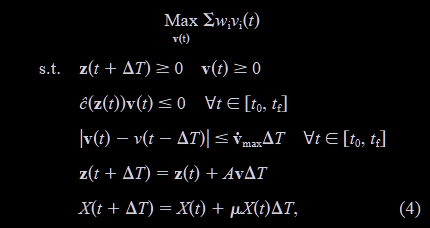


where T is the length of the time interval chosen. 

The optimization problem was solved using CPLEX. The dynamic equations were integrated assuming that the fluxes  were constant over the interval. The optimization problem was then formulated at the next time instant and solved. This procedure was repeated from t0 to tf. For the class of systems involving only bilinear terms with fluxes and the biomass concentration, it is possible to directly solve the dynamic equations and thereby eliminate the numerical integration.



Simply put, it performs FBA for each given time point and calculates the fluxes through the system at the beginning of that time point. With each iteration, external metabolites and biomasses concentrations are updated, followed by another FBA, with the new values. This process continues until the objective function becomes infeasible (e.g. by a lack of nutrients), or the final time point is reached. This modeling approach enables the exploration of metabolic network adjustments to evolving environmental factors, substrate availability, and cellular demands.

### dynamic Single FBA

In [14]:
#static optimization approach (SOA)
from cbmpy.CBModel import Model
from dcFBA.DynamicModels import DynamicSingleFBA
from dcFBA.DefaultModels import read_default_model
import matplotlib.pyplot as plt

model: Model = read_default_model("e_coli_core")

# Set bounds on the glucose import
model.getReaction("R_GLCpts").setUpperBound(10)
reaction = model.getReaction("R_GLCpts")
print(reaction.id, "(ub:",reaction.getUpperBound(),")")


FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.002
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.0

User defined contraint FBC version 2
SBML3 load time: 0.15

R_GLCpts (ub: 10.0 )


In [15]:
'''
PARAMETERS FOR dFBA
initial_biomass: The initial biomass concentration in mmol/L
initial_concentrations: A dictionary with the initial concentrations of the extracellular metabolites in mmol/L

'''

initial_biomass = 0.1  # Set the initial biomass
initial_concentrations = {"M_glc__D_e": 10}  # We start with 10 mmol of glucose

''' 
DynamicSingleFBA(
    model: Model,
    biomass_id: str,
    initial_biomass: float,
    initial_concentrations: dict[str, float] = {},
    kinetics: KineticsStruct = KineticsStruct({})
)
''' 

ds = DynamicSingleFBA(
    model,
    "R_BIOMASS_Ecoli_core_w_GAM",
    initial_biomass,
    initial_concentrations,
)  # Define a DynamicSingleFBA object given the model and the id of the biomass reaction

Adding objective: R_BIOMASS_Ecoli_core_w_GAM_objective
Objective R_BIOMASS_Ecoli_core_w_GAM_objective (idx=0) set active
getState1
Model clone time: 0.9126384258270264


In [16]:
ds.simulate(0.15) #Run the simulation with time step (delta t) of 0.15
'''
try:
    ds.simulate(0.15)
except Exception as e:
    print(f"Error during simulation: {e}")
'''

User defined contraint FBC version 1

cplx_constructLPfromFBA time: 0.0032689571380615234


cplx_analyzeModel FBA --> LP time: 0.0032689571380615234

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 16 rows and 17 columns.
Aggregator did 24 substitutions.
Reduced LP has 32 rows, 54 columns, and 216 nonzeros.
Presolve time = 0.00 sec. (0.11 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =           100.000000
INFO: Model is optimal: 1
Solution status =  1 : optimal
Solution method =  2 : dual
Objective value =  0.08739215069684302
Solution available (status=optimal) type: 1
Model is optimal
Status: LPS_OPT
Solution available (status=optimal) type: 1
Model is optimal
Solution available (status=optimal) type: 1
Model is optimal

analyzeModel objective value: 0.08739215069684302

User defined contraint FBC version 1
User defined cont

'\ntry:\n    ds.simulate(0.15)\nexcept Exception as e:\n    print(f"Error during simulation: {e}")\n'

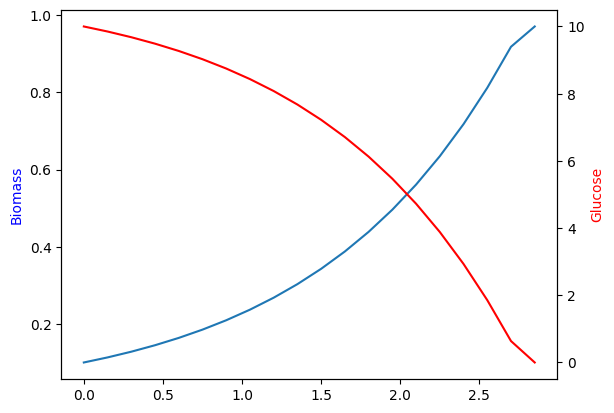

In [17]:
#Methods to retrieve the simulation results
T = ds.get_time_points()
metabolites = ds.get_metabolites()
biomass = ds.get_biomass()

ax = plt.subplot(111)
ax.plot(T, biomass)
ax2 = plt.twinx(ax)
ax2.plot(T, metabolites["M_glc__D_e"], color="r")

ax.set_ylabel("Biomass", color="b")
ax2.set_ylabel("Glucose", color="r")
plt.show()

### dynamic community model


#### Compartments: 

The external or e compartment from individual models is singular and shared in the community model. This ensures that all external species from all models coexist. When compartments from individual models are copied into the community model, they are appended with a suffix based on the provided ID. This procedure helps in tracking and identifying which organism each compartment corresponds to.


#### Reactions:

Reaction Duplication: All reactions of from the single organism models are duplicated within the community model. Given the example, all reactions, except the exchange reactions, are copied to the community model. Furthermore, to maintain traceability, each reaction ID is supplemented with the originating model ID.

Handling Exchange Reactions: A distinctive approach is employed for exchange reactions. When identical exchange reactions (eg two exchange reactions with the same reaction id) are present in multiple models, only a single instance is retained in the combined community model.


#### Reagents and species:

External Metabolites: Given that the community shares all external metabolites, only a single instance of each external metabolite is retained in the combined model.

Species Duplication and Identification: All other Species are copied to the community model. However, to maintain clarity and avoid confusion, a species receives a distinguishing suffix only when it’s present in more than one original model.




In [18]:
#Community Model

from dcFBA.Models import CommunityModel
from dcFBA.DefaultModels import read_default_model
from cbmpy.CBModel import Model

model1:Model = read_default_model("e_coli_core")
model2:Model = read_default_model("strep_therm")

# Use model.getActiveObjectiveReactionIds() to find the biomass reaction id
biomass_reaction_model_1 = (
    "R_BIOMASS_Ecoli_core_w_GAM"  # Biomass reaction id of ecoli
)

biomass_reaction_model_2 = "R_biomass_STR"  # Biomass reaction id of strep.


community_model: CommunityModel = CommunityModel(
    [model1, model2],
    [
        biomass_reaction_model_1,
        biomass_reaction_model_2,
    ],
)

FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.002
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

User defined contraint FBC version 2
SBML3 load time: 0.157

FBC version: 2
M.getNumReactions: 656
M.getNumSpecies: 632
FBC.getNumObjectives: 1
FBC.getNumParameters: 16
FBC.getNumGeneProducts: 476
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.012
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.01
Gene G_CH8_1395 is not part of a GPR association. Will create anyway!
Gene G_CH8_1397 is not part of a GPR association. Will create anyway!
Gene G_CH8_1733 is not part of a GPR association. Will create anyway!
Gene G_CH8_0614 is not part of a GPR association. Will create anyway!
Gene G_CH8_1722 is not par

In [19]:
# Dynamic Joint FBA for community model
from dcFBA.DynamicModels import DynamicJointFBA
from dcFBA.DefaultModels import read_default_model


model1: Model = read_default_model("e_coli_core")
model2: Model = read_default_model("strep_therm")


# Set the import bounds for glucose in both models
model1.getReaction("R_GLCpts").setUpperBound(10)
model2.getReaction("R_GLCpts").setUpperBound(6)

# The biomass reactions ids
biomass_reaction_model_1: str = "R_BIOMASS_Ecoli_core_w_GAM"
biomass_reaction_model_2: str = "R_biomass_STR"

cm = CommunityModel(
    [model1, model2],
    [biomass_reaction_model_1, biomass_reaction_model_2],
    ["ecoli", "strep"],
)  # Define the community model

dynamic_joint_fba = DynamicJointFBA(
    cm,
    [1.0, 1.0],
    {
        "M_glc__D_e": 100,
        "M_succ_e": 0,
        "M_glu__L_e": 0.0,
        "M_gln__L_e": 0.0,
        "M_lcts_e": 100,
    },
)  # Create a DynamicJointFBA object, set the initial concentrations of glucose and lactose to 100

FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.002
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

User defined contraint FBC version 2
SBML3 load time: 0.15

FBC version: 2
M.getNumReactions: 656
M.getNumSpecies: 632
FBC.getNumObjectives: 1
FBC.getNumParameters: 16
FBC.getNumGeneProducts: 476
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.012
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.011
Gene G_CH8_1395 is not part of a GPR association. Will create anyway!
Gene G_CH8_1397 is not part of a GPR association. Will create anyway!
Gene G_CH8_1733 is not part of a GPR association. Will create anyway!
Gene G_CH8_0614 is not part of a GPR association. Will create anyway!
Gene G_CH8_1722 is not par

In [20]:
dynamic_joint_fba.simulate(0.1)

User defined contraint FBC version 1

cplx_constructLPfromFBA time: 0.013935089111328125


cplx_analyzeModel FBA --> LP time: 0.013935089111328125

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 260 rows and 210 columns.
Aggregator did 249 substitutions.
Reduced LP has 167 rows, 277 columns, and 1357 nonzeros.
Presolve time = 0.00 sec. (1.04 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =          1428.816467
Iteration:    62   Dual objective     =           168.771447
Iteration:   124   Dual objective     =            24.074154
INFO: Model is optimal: 1
Solution status =  1 : optimal
Solution method =  2 : dual
Objective value =  22.967668317436036
Solution available (status=optimal) type: 1
Model is optimal
Status: LPS_OPT
Solution available (status=optimal) type: 1
Model is optimal
Solution available (status=optimal) type: 

CPLEX Error  1217: No solution exists.


INFO: Model is infeasible: 3
CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
Status: LPS_NONE
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0

analyzeModel objective value: nan



In [21]:
biomasses = dynamic_joint_fba.get_biomasses()
metabolites = dynamic_joint_fba.get_metabolites()
time_points = dynamic_joint_fba.get_time_points()
fluxes = dynamic_joint_fba.get_fluxes()
''' 
To retrieve the species-specific flux over (in 
) time you can use the DynamicModelBase.get_specific_flux_values() method.
'''
specific_flux_values = dynamic_joint_fba.get_specific_flux_values("R_GLCpts_ecoli")

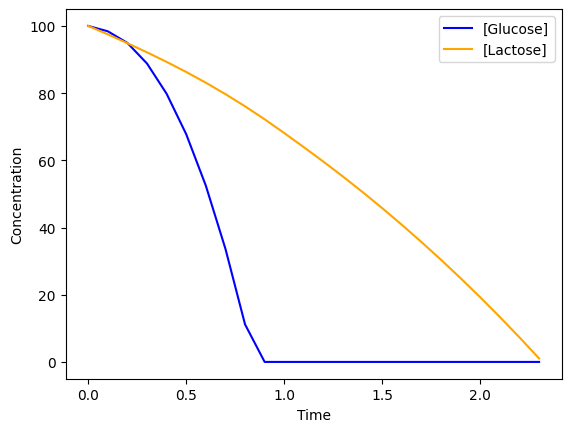

In [22]:
plt.plot(
    time_points, metabolites["M_glc__D_e"], color="blue", label="[Glucose]"
)
plt.plot(
    time_points, metabolites["M_lcts_e"], color="orange", label="[Lactose]"
)

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

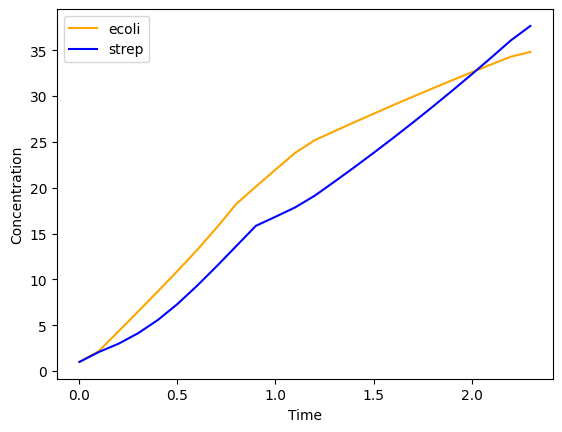

In [23]:
plt.plot(time_points, biomasses["ecoli"], color="orange", label="ecoli")
plt.plot(time_points, biomasses["strep"], color="blue", label="strep")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

### dynamic parallel FBA

to model microbial interactions available through this package is Dynamic Parallel FBA (dpFBA). The key idea is to perform FBA on individual models while keeping track of the pool or medium of external metabolites from which all models can take up nutrients. Again we keep track of the overall concentrations of biomass and external metabolites and update this using the set time interval.

In [25]:
from dcFBA import DefaultModels
from dcFBA.DynamicModels import DynamicParallelFBA

model1: Model = DefaultModels.read_default_model("e_coli_core")
model2: Model = DefaultModels.read_default_model("strep_therm")

# Exchange reaction are not set correctly, here we fix this
for rid in model1.getReactionIds():
    if rid.startswith("R_EX"):
        reaction = model1.getReaction(rid)
        reaction.is_exchange = True

for rid in model2.getReactionIds():
    if rid.startswith("R_EX"):
        reaction = model2.getReaction(rid)
        reaction.is_exchange = True

# Give the two models different glucose uptake rates
model1.getReaction("R_GLCpts").setUpperBound(10)
model2.getReaction("R_GLCpts").setUpperBound(6)

# Restrict Lactose uptake
model2.getReaction("R_LCTSGALex").setLowerBound(0)
model2.getReaction("R_LCTSt6").setUpperBound(30)

FBC version: 2
M.getNumReactions: 95
M.getNumSpecies: 72
FBC.getNumObjectives: 1
FBC.getNumParameters: 5
FBC.getNumGeneProducts: 137
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.002
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.001

User defined contraint FBC version 2
SBML3 load time: 0.155

FBC version: 2
M.getNumReactions: 656
M.getNumSpecies: 632
FBC.getNumObjectives: 1
FBC.getNumParameters: 16
FBC.getNumGeneProducts: 476
Zero dimension compartment detected: e
Zero dimension compartment detected: c
FluxBounds process1: 0.014
INFO: Active objective: obj
Adding objective: obj
FluxBounds process2: 0.011
Gene G_CH8_1395 is not part of a GPR association. Will create anyway!
Gene G_CH8_1397 is not part of a GPR association. Will create anyway!
Gene G_CH8_1733 is not part of a GPR association. Will create anyway!
Gene G_CH8_0614 is not part of a GPR association. Will create anyway!
Gene G_CH8_1722 is not pa

In [26]:
parallel_fba = DynamicParallelFBA(
    [model1, model2],
    [1.0, 1.0],
    {
        "M_glc__D_e": 100,
        "M_succ_e": 0,
        "M_glu__L_e": 0.0,
        "M_gln__L_e": 0.0,
        "M_lcts_e": 100,
    }
) #Build DynamicParallelFBA model

getState1
Model clone time: 0.11971592903137207
getState1
Model clone time: 0.24880242347717285


In [27]:
parallel_fba.simulate(0.1)

User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.0030031204223632812

Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
User defined contraint FBC version 2
User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.014000177383422852

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 266 rows and 206 columns.
Aggregator did 239 substitutions.
Reduced LP has 127 rows, 211 columns, and 1095 nonzeros.
Presolve time = 0.00 sec. (0.91 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =           428.816467
Iteration:    62   Dual objective     =             1.841437
Solution available (status=optimal) type: 1
Solution available (status=optimal) type: 1
User defined contraint FBC version 2
User defined contraint FBC version 2

cplx_constructLPfromFBA time: 0.00278258323

CPLEX Error  1217: No solution exists.


CPLEX Error  1217: No solution exists.
No solution available (status=infeasible) type: 0
No solution available (status=infeasible) type: 0
model: iRZ476 had an infeasible solution


In [28]:
biomasses = parallel_fba.get_biomasses()
metabolites = parallel_fba.get_metabolites()
T = parallel_fba.get_time_points()
fluxes = parallel_fba.fluxes

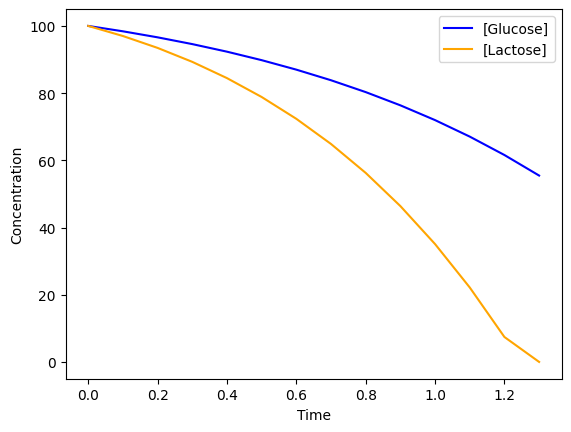

In [29]:
plt.plot(T, metabolites["M_glc__D_e"], color="blue", label="[Glucose]")
plt.plot(T, metabolites["M_lcts_e"], color="orange", label="[Lactose]")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

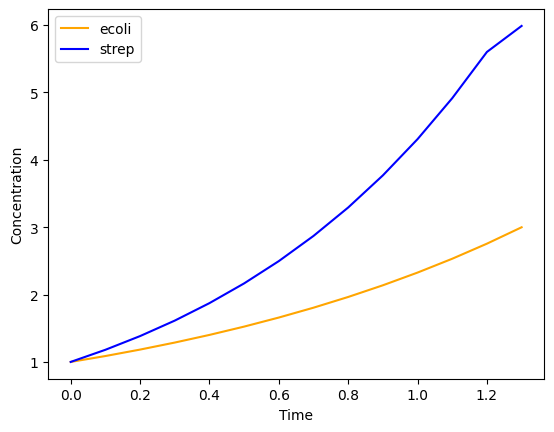

In [30]:
#Plot biomasses
plt.plot(T, biomasses[model1.getId()], color="orange", label="ecoli")
plt.plot(T, biomasses[model2.getId()], color="blue", label="strep")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

### endpoint FBA


In contrast to the previous methods, epFBA does not perform FBA, updates biomasses and metabolite concentrations per time step. Rather, we duplicate the original GSMM for N time steps of size δt and connect each of these models chronologically, such that metabolites and biomass can flow from time point to time point, but never backwards. This creates a multi-organism, multi-time-step compartmentalization of the original model. After comprising such a time-step dependent GSMM, we perform FBA on the entire model. Just like djFBA, we maximize the community biomass. For djFBA, this is calculated for every time step, while here we maximize the exchange of community biomass in the final time point.

In [33]:
from cbmpy.CBModel import Model, Reaction
from dcFBA.ToyModels import model_a, model_b

m_a: Model = model_a.build_toy_model_fba_A()

# Setting some initial bounds on reactions
m_a.getReaction("R_1").setUpperBound(10)
m_a.getReaction("R_4").setUpperBound(3)
m_a.getReaction("R_6").setUpperBound(1)

m_a.getReaction("R_1").setLowerBound(0)
m_a.getReaction("R_4").setLowerBound(0)
m_a.getReaction("R_6").setLowerBound(0)

# Delete the original biomass model from model A as it is redefined in the endPoint model
reaction: Reaction = m_a.getReaction("R_BM_A").deleteReagentWithSpeciesRef(
    "BM_e_A"
)

m_b: Model = model_b.build_toy_model_fba_B()

# Setting some initial bounds on reactions
m_b.getReaction("R_1").setUpperBound(10)
m_b.getReaction("R_3").setUpperBound(1)
m_b.getReaction("R_5").setUpperBound(1)

m_b.getReaction("R_1").setLowerBound(0)
m_b.getReaction("R_3").setLowerBound(0)
m_b.getReaction("R_5").setLowerBound(0)

# Delete the original biomass model from model B
reaction: Reaction = m_b.getReaction("R_BM_B").deleteReagentWithSpeciesRef(
    "BM_e_B"
)

Added "S_e" as a reagent of reaction "R_1"
Added "S_c" as a reagent of reaction "R_1"
Added "S_c" as a reagent of reaction "R_2"
Added "X_c" as a reagent of reaction "R_2"
Added "X_c" as a reagent of reaction "R_3"
Added "Y_c" as a reagent of reaction "R_3"
Added "A_c" as a reagent of reaction "R_3"
Added "Y_c" as a reagent of reaction "R_4"
Added "B_c" as a reagent of reaction "R_4"
Added "BM_c_A" as a reagent of reaction "R_4"
Added "S_c" as a reagent of reaction "R_5"
Added "Z_c" as a reagent of reaction "R_5"
Added "Z_c" as a reagent of reaction "R_6"
Added "B_c" as a reagent of reaction "R_6"
Added "BM_c_A" as a reagent of reaction "R_6"
Added "B_e" as a reagent of reaction "R_import_B"
Added "B_c" as a reagent of reaction "R_import_B"
Added "A_c" as a reagent of reaction "R_export_A"
Added "A_e" as a reagent of reaction "R_export_A"
Added "BM_c_A" as a reagent of reaction "R_BM_A"
Added "BM_e_A" as a reagent of reaction "R_BM_A"
Added "S_e" as a reagent of reaction "S_e_exchange"

In [34]:
from dcFBA.Models import CommunityModel

community_model = CommunityModel(
    [m_a, m_b], ["R_BM_A", "R_BM_B"], ["modelA", "modelB"]
)

Deleting reagent: R_3_A_c
Deleting reagent: R_export_A_A_c
Deleting reagent: R_4_B_c
Deleting reagent: R_6_B_c
Deleting reagent: R_import_B_B_c
Deleting reagent: R_1_S_c
Deleting reagent: R_2_S_c
Deleting reagent: R_5_S_c
Deleting reagent: R_2_X_c
Deleting reagent: R_3_X_c
Deleting reagent: R_5_Z_c
Deleting reagent: R_6_Z_c
Deleting reagent: R_3_A_c
Deleting reagent: R_4_A_c
Deleting reagent: R_import_A_A_c
Deleting reagent: R_5_B_c
Deleting reagent: R_export_B_B_c
Deleting reagent: R_1_S_c
Deleting reagent: R_2_S_c
Deleting reagent: R_4_S_c
Deleting reagent: R_2_X_c
Deleting reagent: R_3_X_c
Deleting reagent: R_4_Z_c
Deleting reagent: R_5_Z_c


In [35]:
from dcFBA.DynamicModels import EndPointFBA

n = 25
ep = EndPointFBA(
    community_model,
    n,
    {"modelA": 1.0, "modelB": 2.0},
    {"S_e": 100, "A_e": 0.0, "B_e": 0.0},
    dt=0.1,
) #CommunityModel, the desired number of time points, 
#initial concentrations for both biomass and metabolites, the time step size 

solution = ep.simulate()
print(solution)
# 12.778

getState1
Model clone time: 0.008486747741699219
Adding objective: X_comm_objective
Objective X_comm_objective (idx=0) set active
Adding constraint: R_5_modelA_time00_lb
Adding constraint: R_5_modelA_time00_ub
Adding constraint: R_2_modelA_time00_lb
Adding constraint: R_2_modelA_time00_ub
Adding constraint: R_BM_B_modelB_time00_lb
Adding constraint: R_BM_B_modelB_time00_ub
Adding constraint: R_4_modelA_time00_ub
Adding constraint: R_3_modelB_time00_ub
Adding constraint: R_BM_A_modelA_time00_lb
Adding constraint: R_BM_A_modelA_time00_ub
Adding constraint: R_import_B_modelA_time00_lb
Adding constraint: R_import_B_modelA_time00_ub
Adding constraint: R_2_modelB_time00_lb
Adding constraint: R_2_modelB_time00_ub
Adding constraint: R_export_A_modelA_time00_lb
Adding constraint: R_export_A_modelA_time00_ub
Adding constraint: R_3_modelA_time00_lb
Adding constraint: R_3_modelA_time00_ub
Adding constraint: R_1_modelB_time00_ub
Adding constraint: R_4_modelB_time00_lb
Adding constraint: R_4_modelB_

In [36]:
fluxes = ep.get_fluxes()

#Obtain the aggregated flux value of reaction 1 of model A in the fifth time point
print(fluxes["R_1_modelA_time05"]) #1.2763

1.2762815625000004


In [37]:
#Get the amount of metabolite S on time 1
print(fluxes["S_e_time00_time01"]) #97.8

#Get the concentration of metabolite B in time step 22
print(fluxes["B_e_time21_time22"]) #6.311

#Get the amount of A at the end of the simulation
print(fluxes['A_e_exchange_final']) #0.0

97.8
6.310889294360367
0.0


In [38]:
biomasses = ep.get_biomasses()
metabolites = ep.get_metabolites()
#Concentration of metabolite S on time point 1
metabolites["S_e"][1]

#Get the aggregated flux of reaction R_1_modelA for each time point
fs = ep.get_flux_values("R_1_modelA")

#print the value of the flux at time point 5
print(fs[5]) #1.2763

1.2762815625000004


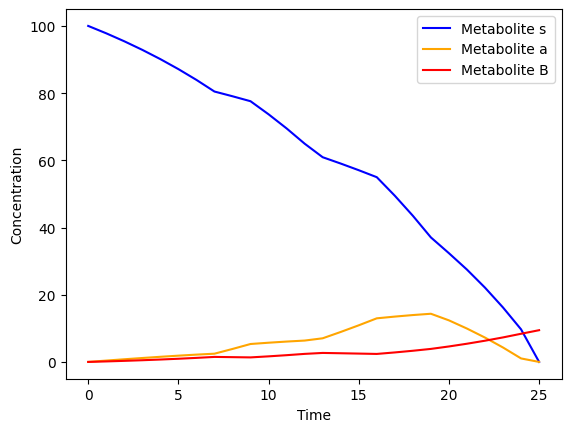

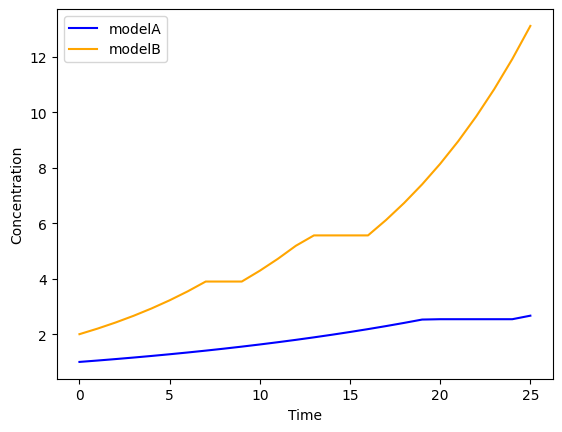

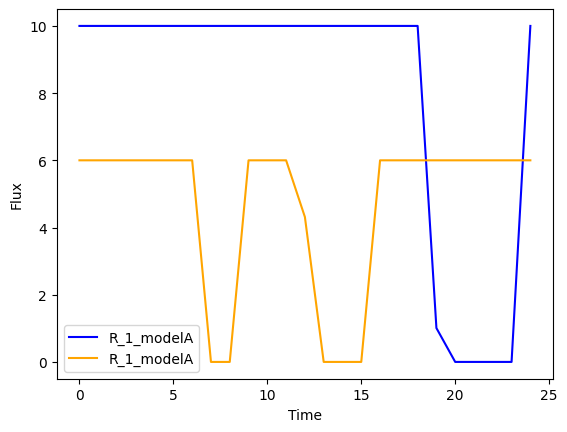

In [39]:
import matplotlib.pyplot as plt
time = ep.get_time_points()

plt.plot(
    range(len(time) + 1),
    metabolites["S_e"],
    color="blue",
    label="Metabolite s",
)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()

plt.plot(
    range(len(time) + 1),
    metabolites["A_e"],
    color="orange",
    label="Metabolite a",
)
plt.xlabel("Time")
plt.ylabel("Concentration")


plt.plot(
    range(len(time) + 1),
    metabolites["B_e"],
    color="red",
    label="Metabolite B",
)
plt.xlabel("Time")
plt.ylabel("Concentration")
# Adding legend
plt.legend()
plt.show()

plt.plot(
    range(len(time) + 1), biomasses["modelA"], color="blue", label="modelA"
)
plt.plot(
    range(len(time) + 1), biomasses["modelB"], color="orange", label="modelB"
)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()


plt.plot(
    range(len(time)),
    ep.get_specific_flux_values("R_1_modelA"),
    color="blue",
    label="R_1_modelA",
)

plt.plot(
    range(len(time)),
    ep.get_specific_flux_values("R_1_modelB"),
    color="orange",
    label="R_1_modelA",
)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend()
plt.show()

# summa

In [27]:
def fun(n):
    p = 0
    for i in range(2, n):
        if n % i == 0 and i % 2 == 1:
            print(i, n)
            p += 1
    return p


In [30]:
fun(60)-fun(59)

3 60
5 60
15 60


3

In [33]:
x = 1
while True:
    if x % 5 == 0:
        break
    print(x, end = ' ')
    x += 1

1 2 3 4 

In [36]:
a = [1,2,3]

try:
    print([a[0]])
    print("Second element = %d" %(a[1]))
    print("Fourth element = %d" %(a[3]))
except:
    print("An error occurred")

[1]
Second element = 2
An error occurred


In [37]:
130 % 24


10

In [38]:
24 % 10

4

In [39]:
10 % 4

2

In [57]:
l = [1,2,3,4,3,2]

In [58]:
l.pop(0)

1

In [59]:
l.pop(-1)

2

In [61]:
def simm(l):
    try:
        while len(l) > 0:
            if l.pop(0) != l.pop(-1):
                return False
        return True
    except IndexError:
        print("IndexError")
    except:
        print("Error")
    else:
        print("Else")

In [63]:
print(simm([1,2,3,4,3,2,1]))
print(simm([2,2,2,2,2,2]))
print(simm([2,2,2,2,2,2,2]))
print(simm[8])
print(simm([2,4,6]))


IndexError
None
True
IndexError
None


TypeError: 'function' object is not subscriptable